# Applied Data Science Captsone Project - The Restaurant Battle of Neighborhoods in Coventry
--------

## **A. Introduction**

#### **A.1. Description & Disscusion of the Background**

Coventry’s status as a growth city was underlined earlier this year by LSH’s Vitality Index, which ranked it as one of the ten fastest-growing locations in the UK. Its growth is built on a diverse economic base, with a well-established manufacturing industry complemented by expanding sectors such as business services, technology and media.

The famous London black cab taxis are produced in Coventry by LTI and these are now the only vehicles still wholly built in Coventry.

Coventry's main industries include: cars, electronic equipment, machine tools, agricultural machinery, man-made fibres, aerospace components and telecommunications equipment. In recent years, the city has moved away from manufacturing industries towards business services, finance, research, design and development, creative industries as well as logistics and leisure.

City of Coventry, where the author lives, attracts a large number of tourists, not least due to its famous cathedral that was destroyed in the world war II, it is also as a home to 13 museums and galleries.


#### **A.2. Business problem**
In 2017, the city of Coventry won the title of UK City of Culture 2021, which means more tourists will visit. 
Finding the right place to eat can be a challenge, due to different tastes, health, religious, cultural, and moral reasons. hence, the purpose of this exercise is to give a simple recommendation to tourists in Coventry:  for example, where to each thai or middle eastern food, where to get fast food? 

From an entrepreneurial point of view, an investor may want to know where and what type of restaurant would be worth their investments

#### **A.3. Target Audience**
* Tourists visiting coventry who would want to know what type of restaurants are availabe and where to eat

*  A business entrepreneur that wants open a new restaurant in Coventry.

*  Business Analyst or Data Scientists, who wish to analyze the neighborhoods of Coventry using python, jupyter notebook and some machine learning techniques.

*  Someone curious about data that want to have an idea, how beneficial it is to open a restaurant and what are the pros and cons of this business.

## B. **Data Description**

Data is everywhere, however, most of the time it is not in the format a researcher is looking for. Using Jupyter notebooks and python and its libraries, one can find data and shape it to their liking.

* The assignment is requesting that we use Foursqaure API, so i will adhere to that in here.

* I found some information about Cvoentry in Wikipedia [1] but as it is limited, I looked and found two other websites, that are great of geolocations, postcodes and area boundaries of cities and towns in the uk, the first one is Mapit UK [2]  and UK-GeoJSON[3]

* I used **Forsquare API** to get the most common venues of given area of Coventry [4].


## **B. Methodology**
----

#### **B.1. Creating data table and data pre-processing**

As a database, I used GitHub repository in my study. My master data coventry_data_all dataframe  which has the main components is a collections of many data sources and data manipulations

We need to import the libraries we will be working with

In [326]:
%pip install geopy


import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import wikipedia as wp
from bs4 import BeautifulSoup
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


from folium import plugins
from folium.plugins import HeatMap

print('Libraries imported.')



Libraries imported.


In [15]:
#pip install geopanda

In [9]:
#!pip install shapely

#### Checking data in Wikipedia

In [51]:
#wikipedia 
url = 'https://en.wikipedia.org/wiki/CV_postcode_area'
coventry_postcodes = pd.read_html(url)
cov_post_codes = coventry_postcodes[1]

In [52]:
#rename columns
cov_post_codes.rename(columns = {'Postcode district': 'postcode'}, inplace=True)

In [53]:
cov_post_codes

,postcode,Post town,Coverage,Local authority area(s)
0,CV1,COVENTRY,"Coventry C (Coventry City Centre, Gosford Gree...",Coventry
1,CV2,COVENTRY,"Coventry NE (Walsgrave, Wyken, Stoke, Bell Gre...",Coventry
2,CV3,COVENTRY,"Coventry SE (Binley, Whitley, Willenhall, Chey...","Coventry, Rugby"
3,CV4,COVENTRY,"Coventry SW (Tile Hill, Canley, Cannon Park, L...",Coventry
4,CV5,COVENTRY,"Coventry NW (Allesley, Allesley Park, Allesley...",Coventry
5,CV6,COVENTRY,"Coventry N (Holbrooks, Coundon, Radford, Longf...","Coventry, Nuneaton and Bedworth"
6,CV7,COVENTRY,"Exhall, Ash Green, Keresley, Meriden, Balsall ...","Nuneaton and Bedworth, North Warwickshire, Cov..."
7,CV8,COVENTRY,"Wolston, Ryton-on-Dunsmore","Warwick, Rugby"
8,CV8,KENILWORTH,"Kenilworth, Baginton, Bubbenhall, Burton Green...","Warwick, Rugby"
9,CV9,ATHERSTONE,"Atherstone, Mancetter, Grendon, Baddesley Enso...","North Warwickshire, Hinckley and Bosworth"


##### Data is lacking here
Since we only need areas where Coventry Authority is in charge of, 
This above will only give us 6 areas of coventry as they were segmented by postcode

luckily i found a website that has all geojson, we will use that, download the data and use it for both geo location and pick the 
latitude and the longitude from it

In [328]:
#load the file from https://martinjc.github.io/UK-GeoJSON/
coventry_neighborhood_geodf = gpd.read_file('coventry_boundaries.geojson')
coventry_neighborhood_geodf.head()

,id,WD13CD,WD13CDO,WD13NM,WD13NMW,geometry
0,E05001218,E05001218,00CQFU,Bablake,None,"POLYGON ((-1.52929 52.41871, -1.53465 52.42134..."
1,E05001219,E05001219,00CQFW,Binley and Willenhall,None,"POLYGON ((-1.46293 52.37639, -1.46539 52.37802..."
2,E05001220,E05001220,00CQFX,Cheylesmore,None,"POLYGON ((-1.50450 52.37779, -1.50448 52.37812..."
3,E05001221,E05001221,00CQFY,Earlsdon,None,"POLYGON ((-1.50938 52.37876, -1.51609 52.37982..."
4,E05001222,E05001222,00CQFZ,Foleshill,None,"POLYGON ((-1.50921 52.41305, -1.50951 52.41563..."


In [329]:
coventry_neighborhood = coventry_neighborhood_geodf[['WD13CD', 'WD13NM', 'geometry']].copy()
coventry_neighborhood.columns = ('Id', 'Neighborhood', 'Geometry')
coventry_neighborhood['Neighborhood'] = coventry_neighborhood['Neighborhood'].str.title()
coventry_neighborhood.head()

,Id,Neighborhood,Geometry
0,E05001218,Bablake,"POLYGON ((-1.52929 52.41871, -1.53465 52.42134..."
1,E05001219,Binley And Willenhall,"POLYGON ((-1.46293 52.37639, -1.46539 52.37802..."
2,E05001220,Cheylesmore,"POLYGON ((-1.50450 52.37779, -1.50448 52.37812..."
3,E05001221,Earlsdon,"POLYGON ((-1.50938 52.37876, -1.51609 52.37982..."
4,E05001222,Foleshill,"POLYGON ((-1.50921 52.41305, -1.50951 52.41563..."


In [330]:
for neighborhood in coventry_neighborhood:
    print(neighborhood)

Id
Neighborhood
Geometry


### Get latitude and longitude

In [331]:
from shapely.wkt import loads as load_wkt

centroid_list = []

for polygon in coventry_neighborhood_geodf["geometry"]:
    box_str = str(polygon)
    p1 = load_wkt(box_str)
    point = p1.centroid
#     print(type(p1.centroid.x))
#     print(p1.centroid.y)
    centroid_list.append((p1.centroid.y, p1.centroid.x))

lat_centr, lon_centr = zip(*centroid_list)

coventry_neighborhood['Latitude'] = lat_centr
coventry_neighborhood['Longitude'] = lon_centr
coventry_neighborhood

,Id,Neighborhood,Geometry,Latitude,Longitude
0,E05001218,Bablake,"POLYGON ((-1.52929 52.41871, -1.53465 52.42134...",52.439341,-1.565273
1,E05001219,Binley And Willenhall,"POLYGON ((-1.46293 52.37639, -1.46539 52.37802...",52.391733,-1.457056
2,E05001220,Cheylesmore,"POLYGON ((-1.50450 52.37779, -1.50448 52.37812...",52.387161,-1.492103
3,E05001221,Earlsdon,"POLYGON ((-1.50938 52.37876, -1.51609 52.37982...",52.393886,-1.531970
4,E05001222,Foleshill,"POLYGON ((-1.50921 52.41305, -1.50951 52.41563...",52.428311,-1.497469
5,E05001223,Henley,"POLYGON ((-1.45216 52.44964, -1.44607 52.44753...",52.433886,-1.449003
6,E05001224,Holbrook,"POLYGON ((-1.52257 52.43538, -1.52300 52.43931...",52.443502,-1.513496
7,E05001225,Longford,"POLYGON ((-1.50003 52.45102, -1.49873 52.45100...",52.446222,-1.478762
8,E05001226,Lower Stoke,"POLYGON ((-1.48537 52.39594, -1.48848 52.39732...",52.404403,-1.473717
9,E05001227,Radford,"POLYGON ((-1.51496 52.41161, -1.51487 52.41483...",52.424336,-1.517428


###  Remove unecessary colums

In [332]:
del coventry_neighborhood['Geometry']
del coventry_neighborhood['Id']

In [333]:
### Check type of df
type(coventry_neighborhood)

geopandas.geodataframe.GeoDataFrame

In [334]:
#we can copy this data of areas and their latitude and longitude and save it to a csv
coventry_neighborhood.to_csv(r'coventry_areas_data_lat_lon.csv') 

In [335]:
coventry_neighborhood

,Neighborhood,Latitude,Longitude
0,Bablake,52.439341,-1.565273
1,Binley And Willenhall,52.391733,-1.457056
2,Cheylesmore,52.387161,-1.492103
3,Earlsdon,52.393886,-1.531970
4,Foleshill,52.428311,-1.497469
5,Henley,52.433886,-1.449003
6,Holbrook,52.443502,-1.513496
7,Longford,52.446222,-1.478762
8,Lower Stoke,52.404403,-1.473717
9,Radford,52.424336,-1.517428


In [336]:
what = coventry_neighborhood_geodf['geometry']

In [337]:
coventry_data = pd.DataFrame(coventry_neighborhood)

In [338]:
with open(r'coventry_areas_data_lat_lon.json', 'w') as f:
        f.write(what.to_json())

In [339]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


In [358]:
#coventry_data_df = coventry_data_df.reset_index(drop=True)
coventry_data_df = coventry_data_df.sort_values('Neighbourhoods')
coventry_data_df

,Neighbourhoods,Neighbourhoods ids,postcodes
0,Bablake,8907,CV6 2AG
1,Binley and Willenhall,8911,CV3 2DH
2,Cheylesmore,8910,CV3 4AH
3,Earlsdon,8909,CV3 5AZ
4,Foleshill,8914,CV1 4NZ
5,Henley,8905,CV2 1EN
6,Holbrook,8922,CV6 6HX
7,Longford,8921,CV2 1NW
8,Lower Stoke,8918,CV2 5FR
9,Radford,8917,CV6 1DT


In [ ]:
#merging dataframes
coventry_data_all = coventry_data.merge(coventry_data_df, on="Neighbourhoods")

In [418]:
coventry_data_all.to_json()

'{"Neighbourhoods":{"0":"Bablake","1":"Cheylesmore","2":"Earlsdon","3":"Foleshill","4":"Henley","5":"Holbrook","6":"Longford","7":"Lower Stoke","8":"Radford","9":"Sherbourne","10":"Upper Stoke","11":"Wainbody","12":"Westwood","13":"Whoberley","14":"Woodlands","15":"Wyken"},"Latitude":{"0":52.4393405109,"1":52.3871605238,"2":52.3938858963,"3":52.4283110894,"4":52.4338855272,"5":52.443501981,"6":52.446222045,"7":52.4044031779,"8":52.4243360513,"9":52.4160804022,"10":52.4203327068,"11":52.3798941858,"12":52.3961657538,"13":52.4108331737,"14":52.4121607184,"15":52.412568551},"Longitude":{"0":-1.5652734287,"1":-1.4921034533,"2":-1.5319701975,"3":-1.4974694922,"4":-1.4490029497,"5":-1.5134961301,"6":-1.4787621603,"7":-1.473716983,"8":-1.5174280999,"9":-1.535555684,"10":-1.4770832884,"11":-1.5420192268,"12":-1.579311793,"13":-1.5495117626,"14":-1.5835860364,"15":-1.4485989548},"Neighbourhoods ids":{"0":8907,"1":8910,"2":8909,"3":8914,"4":8905,"5":8922,"6":8921,"7":8918,"8":8917,"9":8916,"10":

In [360]:
coventry_data_all

,Neighbourhoods,Latitude,Longitude,Neighbourhoods ids,postcodes,Cluster Labels
0,Bablake,52.439341,-1.565273,8907,CV6 2AG,2
1,Cheylesmore,52.387161,-1.492103,8910,CV3 4AH,0
2,Earlsdon,52.393886,-1.531970,8909,CV3 5AZ,1
3,Foleshill,52.428311,-1.497469,8914,CV1 4NZ,0
4,Henley,52.433886,-1.449003,8905,CV2 1EN,3
5,Holbrook,52.443502,-1.513496,8922,CV6 6HX,3
6,Longford,52.446222,-1.478762,8921,CV2 1NW,3
7,Lower Stoke,52.404403,-1.473717,8918,CV2 5FR,0
8,Radford,52.424336,-1.517428,8917,CV6 1DT,1
9,Sherbourne,52.416080,-1.535556,8916,CV6 1GH,1


#### **B.2. Visual Map & Clustering in Borough**

#### We will use folium library to visualize geographic details of Istanbul and its boroughs.

In [151]:
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#!conda install -c conda-forge folium=0.7.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#import folium # map rendering library

#### I use geopy library to get the latitude and longitude values of Coventry

In [342]:
address = 'Coventry, United Kingdom'

geolocator = Nominatim(user_agent="coventry_explorer")
#geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Istanbul are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Istanbul are 52.4081812, -1.510477.


#### We can create a map of Coventry with areas superimposed on top. We use latitude and longitude values to get the visual

In [361]:
# create map of Coventryusing latitude and longitude values
map_coventry = folium.Map(location=[latitude,longitude], zoom_start=10)

# add markers to map
for lat, lng,postcodes,  neighborhood in zip(coventry_data_all['Latitude'], coventry_data_all['Longitude'], coventry_data_all['postcodes'], coventry_data_all['Neighbourhoods']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_coventry)  
    
map_coventry

#### Another way of displaying the areas using Geojson

In [362]:
plt.rcParams['figure.figsize'] = (20, 10)

In [363]:
from shapely.wkt import loads as load_wkt

centroid_list = []

for polygon in coventry_neighborhood_geodf["geometry"]:
    box_str = str(polygon)
    p1 = load_wkt(box_str)
    point = p1.centroid
#     print(type(p1.centroid.x))
#     print(p1.centroid.y)
    centroid_list.append((p1.centroid.y, p1.centroid.x))

lat_centr, lon_centr = zip(*centroid_list)

coventry_neighborhood['Latitude'] = lat_centr
coventry_neighborhood['Longitude'] = lon_centr
coventry_neighborhood.head()

,Neighborhood,Latitude,Longitude
0,Bablake,52.439341,-1.565273
1,Binley And Willenhall,52.391733,-1.457056
2,Cheylesmore,52.387161,-1.492103
3,Earlsdon,52.393886,-1.531970
4,Foleshill,52.428311,-1.497469


In [364]:
coventry_neighborhood_geodf.set_crs(epsg=4326, inplace=True)

,id,WD13CD,WD13CDO,WD13NM,WD13NMW,geometry
0,E05001218,E05001218,00CQFU,Bablake,None,"POLYGON ((-1.52929 52.41871, -1.53465 52.42134..."
1,E05001219,E05001219,00CQFW,Binley and Willenhall,None,"POLYGON ((-1.46293 52.37639, -1.46539 52.37802..."
2,E05001220,E05001220,00CQFX,Cheylesmore,None,"POLYGON ((-1.50450 52.37779, -1.50448 52.37812..."
3,E05001221,E05001221,00CQFY,Earlsdon,None,"POLYGON ((-1.50938 52.37876, -1.51609 52.37982..."
4,E05001222,E05001222,00CQFZ,Foleshill,None,"POLYGON ((-1.50921 52.41305, -1.50951 52.41563..."
5,E05001223,E05001223,00CQGA,Henley,None,"POLYGON ((-1.45216 52.44964, -1.44607 52.44753..."
6,E05001224,E05001224,00CQGB,Holbrook,None,"POLYGON ((-1.52257 52.43538, -1.52300 52.43931..."
7,E05001225,E05001225,00CQGC,Longford,None,"POLYGON ((-1.50003 52.45102, -1.49873 52.45100..."
8,E05001226,E05001226,00CQGD,Lower Stoke,None,"POLYGON ((-1.48537 52.39594, -1.48848 52.39732..."
9,E05001227,E05001227,00CQGE,Radford,None,"POLYGON ((-1.51496 52.41161, -1.51487 52.41483..."


In [365]:
m = folium.Map([latitude, longitude], zoom_start=12)

folium.GeoJson(coventry_neighborhood_geodf,
    style_function=lambda x: {
        'color' : 'red',
        'opacity': 0.6,
        'fillColor' : 'green',
        }).add_to(m)

m

## Foursquare API 

#### Let's use the Foursquare API to explore the areas and segment them.

In [366]:
CLIENT_ID = 'JNQNPE3LKP1PIVVZEAK1SMVFFD05ODXGE3GG2IXKPXB3E4VN' # your Foursquare ID
CLIENT_SECRET = 'T04CPFWXMTGZDMSTJR1ET3MW3UIWAO3FI2KZUSOZJOA2C4WE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

'''print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)'''

"print('Your credentails:')\nprint('CLIENT_ID: ' + CLIENT_ID)\nprint('CLIENT_SECRET:' + CLIENT_SECRET)"

#### We will get the first areas's latitude and longitude values.

In [367]:
coventry_data = coventry_data_all

borough_latitude = coventry_data.loc[0, 'Latitude'] # neighborhood latitude value
borough_longitude = coventry_data.loc[0, 'Longitude'] # neighborhood longitude value

neighbourhood = coventry_data.loc[0, 'Neighbourhoods'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood, 
                                                               borough_latitude, 
                                                               borough_longitude))

Latitude and longitude values of Bablake are 52.43934051089206, -1.565273428653401.


First, let's create the GET request URL. Name your URL url. I design the limit as 100 venue and the radius 1500 meter for each area

In [368]:
LIMIT = 100
radius = 1500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    borough_latitude, 
    borough_longitude, 
    radius, 
    LIMIT)


In [369]:
results = requests.get(url).json()

From the Foursquare lab, we know that all the information is in the items key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [370]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

##### Get Nearby Venues

Now we are ready to clean the json and structure it into a pandas dataframe

In [371]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-371-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,The White Lion,Gastropub,52.441254,-1.551403
1,Jaguar Daimler Heritage Museum,Museum,52.435315,-1.560493
2,Jaguar Sports & Social Club,Sports Bar,52.431671,-1.562842
3,Coventry Garden Centre,Garden Center,52.439165,-1.545725
4,Quality Hotel,Hotel,52.428020,-1.575398


##### Count venues relevant to the first entry in the dataframe

How many venues were returned by Foursquare?

In [372]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

5 venues were returned by Foursquare.


#### **B.3. Exploring all Areas in Coventry**

Let's create a function to get all the Neighbourhoods in Coventry

In [373]:
def getNearbyVenues(names, latitudes, longitudes, radius=2500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now we can run the above function on each borough and create a new dataframe called **coventry_venues**

In [374]:
coventry_venues = getNearbyVenues(names=coventry_data['Neighbourhoods'],
                                   latitudes=coventry_data['Latitude'],
                                   longitudes=coventry_data['Longitude']
                                  )

Bablake
Cheylesmore
Earlsdon
Foleshill
Henley
Holbrook
Longford
Lower Stoke
Radford
Sherbourne
Upper Stoke
Wainbody
Westwood
Whoberley
Woodlands
Wyken


#### Let's check the size of the resulting dataframe

In [375]:
print(coventry_venues.shape)
coventry_venues.head()

(917, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bablake,52.439341,-1.565273,"Windmill Village Hotel, Golf & Leisure Club",52.426513,-1.576180,Hotel
1,Bablake,52.439341,-1.565273,The White Lion,52.441254,-1.551403,Gastropub
2,Bablake,52.439341,-1.565273,Allesley Park,52.419399,-1.560200,Park
3,Bablake,52.439341,-1.565273,The Old Shepherd,52.435016,-1.531148,Pub
4,Bablake,52.439341,-1.565273,The Tollgate,52.420072,-1.552890,Pub


#### Let's check how many venues were returned for each area/neighbourhood and sort them in count

In [376]:
summary = coventry_venues.groupby('Borough').count().reset_index()
summary['Count'] = summary['Venue']
summary = summary.drop(['Borough Latitude', 'Borough Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category'], axis=1)
summary = summary.sort_values('Count').reset_index(drop=True)
summary.head()

,Borough,Count
0,Bablake,16
1,Henley,22
2,Woodlands,29
3,Upper Stoke,31
4,Longford,35


#### We can create a bar chart and analyse the big picture of it

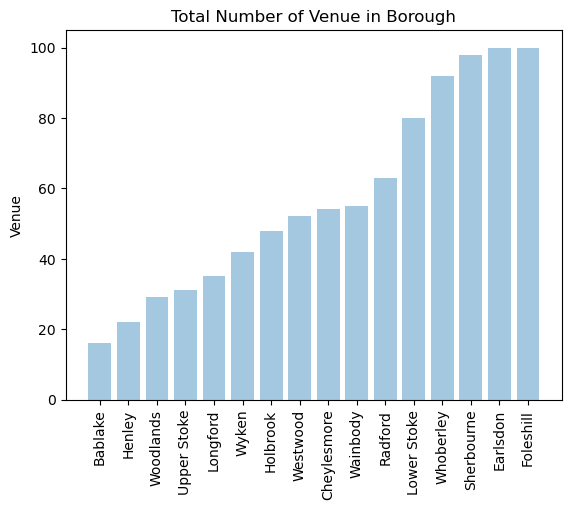

In [377]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = summary.Borough
y_pos = np.arange(len(objects))
performance = summary.Count

plt.bar(y_pos, performance, align='center', alpha=0.4)
plt.xticks(y_pos, objects)
plt.ylabel('Venue')
plt.title('Total Number of Venue in Borough')
plt.xticks(rotation=90)

plt.show()

Here is we can see that Foleshill, Earlsdon have reached the **100** limit of venues. On the other hand; Pendik, Arnavutkoy, Tuzla, Adalar, Buyukcekmece, Sultangazi, Cekmekoy, Beylikduzu, Bablake is below **20** venues in our given coordinates with Latitude and Longitude.

The result doesn't mean that inquiry run all the possible results in boroughs. Actually, it depends on given Latitude and Longitude informations and in here,we just run single Latitude and Longitude pair for each borough. We can increase the possibilities with Neighborhood informations with more Latitude and Longitude informations.



##### Let's find out how many unique categories can be curated from all the returned venues

In [291]:
print('There are {} uniques categories.'.format(len(coventry_venues['Venue Category'].unique())))

There are 109 uniques categories.


##### Our focus will be on restaurants only

So need to filter the venues and leave only restaurants veneues

In [379]:
# Create a Data-Frame out of it to concentrate only on Restaurants 
coventry_Venues_only_restaurant = coventry_venues[coventry_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
coventry_Venues_only_restaurant.index = np.arange(1, len(coventry_Venues_only_restaurant )+1)

In [380]:
print (coventry_Venues_only_restaurant['Venue Category'].value_counts())

Indian Restaurant            36
Fast Food Restaurant         31
Chinese Restaurant           17
Italian Restaurant           15
Asian Restaurant             14
Restaurant                   12
Middle Eastern Restaurant     9
Thai Restaurant               8
English Restaurant            7
Portuguese Restaurant         7
Turkish Restaurant            7
Lebanese Restaurant           6
Latin American Restaurant     5
Japanese Restaurant           4
American Restaurant           4
Greek Restaurant              3
Persian Restaurant            3
Mexican Restaurant            3
Korean Restaurant             2
Pakistani Restaurant          1
Name: Venue Category, dtype: int64


In [381]:
print('There are {} unique categories.'.format(len(coventry_Venues_only_restaurant['Venue Category'].unique())))

There are 20 unique categories.


##### Top 10 categories

In [383]:
# create a dataframe of top 10 categories
coventry_Venues_Top10 = coventry_Venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
coventry_Venues_Top10=coventry_Venues_Top10.reset_index()
coventry_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
coventry_Venues_Top10

,Venue_Category,Frequency
0,Indian Restaurant,36
1,Fast Food Restaurant,31
2,Chinese Restaurant,17
3,Italian Restaurant,15
4,Asian Restaurant,14
5,Restaurant,12
6,Middle Eastern Restaurant,9
7,Thai Restaurant,8
8,English Restaurant,7
9,Portuguese Restaurant,7


#### We can also draw barplot for the frquency of most frequent venues

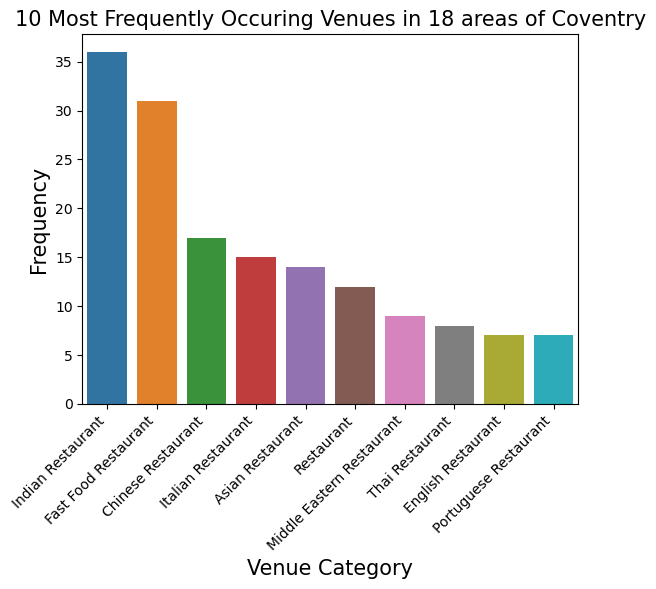

<Figure size 1800x700 with 0 Axes>

In [384]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=coventry_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in 18 areas of Coventry', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

<strong>Size of the dataframe that results.</strong>

In [385]:
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", coventry_Venues_only_restaurant.shape)
coventry_Venues_only_restaurant.shape
coventry_Venues_only_restaurant.head(10)

Shape of the Data-Frame with Venue Category only Restaurant:  (194, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Bablake,52.439341,-1.565273,The Elms (Harvester),52.421948,-1.556199,English Restaurant
2,Cheylesmore,52.387161,-1.492103,Thai Dusit,52.403621,-1.500624,Thai Restaurant
3,Cheylesmore,52.387161,-1.492103,Chinese Kitchen,52.407530,-1.497154,Chinese Restaurant
4,Cheylesmore,52.387161,-1.492103,habibi,52.407566,-1.497013,Middle Eastern Restaurant
5,Cheylesmore,52.387161,-1.492103,Al-bader lebanese restaurant,52.407088,-1.509154,Lebanese Restaurant
6,Cheylesmore,52.387161,-1.492103,Sonargaon,52.394339,-1.505905,Indian Restaurant
7,Cheylesmore,52.387161,-1.492103,Sultan Restaurant,52.408187,-1.493374,Turkish Restaurant
8,Cheylesmore,52.387161,-1.492103,Marina Fish Bar,52.385669,-1.470756,Fast Food Restaurant
9,Cheylesmore,52.387161,-1.492103,Hong Kong House,52.372264,-1.492327,Chinese Restaurant
10,Cheylesmore,52.387161,-1.492103,Empress Fish Bar,52.404831,-1.482922,Fast Food Restaurant


In [251]:
#removing duplicates
#coventry_Venues_only_restaurant = coventry_Venues_only_restaurant[~coventry_Venues_only_restaurant.index.duplicated(keep='first')]

In [386]:
coventry_Venues_only_restaurant.shape

(194, 7)

In [387]:
coventry_Venues_restaurant = coventry_Venues_only_restaurant.groupby(['Borough'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

### Analysis of the neighborhoods.

In [388]:
coventry_Venues_restaurant

Borough
Bablake         1
Cheylesmore     9
Earlsdon       25
Foleshill      23
Henley          5
Holbrook        5
Longford        5
Lower Stoke    22
Radford        16
Sherbourne     26
Upper Stoke     9
Wainbody        9
Westwood        4
Whoberley      22
Woodlands       4
Wyken           9
Name: Venue Category, dtype: int64

In [389]:
coventry_Venues_restaurant_df  = coventry_Venues_restaurant.to_frame().reset_index()
coventry_Venues_restaurant_df.columns = ['Neighbourhoods', 'Number of Restaurant']
coventry_Venues_restaurant_df.index = np.arange(1, len(coventry_Venues_restaurant_df)+1)
list_rest_no =coventry_Venues_restaurant_df['Number of Restaurant'].to_list()
list_dist =coventry_Venues_restaurant_df['Neighbourhoods'].to_list()

### Analysing Each Borough

We will anayze each borough with venues informations

In [390]:
# one hot encoding
coventry_onehot = pd.get_dummies(coventry_Venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
coventry_onehot['Borough'] = coventry_Venues_only_restaurant['Borough'] 

# move neighborhood column to the first column
list_column = coventry_onehot.columns.tolist()
number_column = int(list_column.index('Borough'))
list_column = [list_column[number_column]] + list_column[:number_column] + list_column[number_column+1:] 
coventry_onehot = coventry_onehot[list_column]

coventry_onehot.head()

,Borough,American Restaurant,Asian Restaurant,Chinese Restaurant,English Restaurant,Fast Food Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Pakistani Restaurant,Persian Restaurant,Portuguese Restaurant,Restaurant,Thai Restaurant,Turkish Restaurant
1,Bablake,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Cheylesmore,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Cheylesmore,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Cheylesmore,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,Cheylesmore,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


#### Next, let's group rows by borough and by taking the mean of the frequency of occurrence of each category

In [391]:
coventry_grouped = coventry_onehot.groupby('Borough').mean().reset_index()
coventry_grouped.head()

,Borough,American Restaurant,Asian Restaurant,Chinese Restaurant,English Restaurant,Fast Food Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Pakistani Restaurant,Persian Restaurant,Portuguese Restaurant,Restaurant,Thai Restaurant,Turkish Restaurant
0,Bablake,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000
1,Cheylesmore,0.000000,0.000000,0.222222,0.0,0.222222,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.0,0.00,0.000000,0.000000,0.111111,0.111111
2,Earlsdon,0.000000,0.080000,0.000000,0.0,0.040000,0.040000,0.320000,0.120000,0.040000,0.000000,0.040000,0.040000,0.000000,0.040000,0.0,0.04,0.040000,0.080000,0.080000,0.000000
3,Foleshill,0.043478,0.086957,0.086957,0.0,0.173913,0.043478,0.000000,0.130435,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.0,0.00,0.043478,0.043478,0.000000,0.086957
4,Henley,0.000000,0.000000,0.000000,0.0,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.200000,0.400000,0.000000,0.000000


In [392]:
coventry_grouped

,Borough,American Restaurant,Asian Restaurant,Chinese Restaurant,English Restaurant,Fast Food Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Pakistani Restaurant,Persian Restaurant,Portuguese Restaurant,Restaurant,Thai Restaurant,Turkish Restaurant
0,Bablake,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Cheylesmore,0.000000,0.000000,0.222222,0.000000,0.222222,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.111111,0.111111
2,Earlsdon,0.000000,0.080000,0.000000,0.000000,0.040000,0.040000,0.320000,0.120000,0.040000,0.000000,0.040000,0.040000,0.000000,0.040000,0.000000,0.040000,0.040000,0.080000,0.080000,0.000000
3,Foleshill,0.043478,0.086957,0.086957,0.000000,0.173913,0.043478,0.000000,0.130435,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.000000,0.000000,0.043478,0.043478,0.000000,0.086957
4,Henley,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.400000,0.000000,0.000000
5,Holbrook,0.200000,0.000000,0.000000,0.000000,0.400000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Longford,0.200000,0.000000,0.000000,0.000000,0.400000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Lower Stoke,0.000000,0.090909,0.136364,0.045455,0.227273,0.000000,0.090909,0.000000,0.045455,0.045455,0.045455,0.045455,0.000000,0.045455,0.000000,0.000000,0.045455,0.000000,0.045455,0.090909
8,Radford,0.000000,0.125000,0.062500,0.000000,0.000000,0.000000,0.250000,0.125000,0.000000,0.000000,0.062500,0.062500,0.000000,0.125000,0.000000,0.000000,0.062500,0.062500,0.062500,0.000000
9,Sherbourne,0.000000,0.115385,0.038462,0.038462,0.076923,0.038462,0.230769,0.115385,0.038462,0.000000,0.038462,0.038462,0.000000,0.038462,0.000000,0.038462,0.038462,0.076923,0.038462,0.000000


<strong>Print the neighbourhoods with their respective top 10 most common venues</strong>

In [393]:
num_top_venues = 10

for hood in coventry_grouped['Borough']:
    print("----"+hood+"----")
    temp = coventry_grouped[coventry_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bablake----
                       venue  freq
0         English Restaurant   1.0
1        American Restaurant   0.0
2        Lebanese Restaurant   0.0
3            Thai Restaurant   0.0
4                 Restaurant   0.0
5      Portuguese Restaurant   0.0
6         Persian Restaurant   0.0
7       Pakistani Restaurant   0.0
8  Middle Eastern Restaurant   0.0
9         Mexican Restaurant   0.0


----Cheylesmore----
                       venue  freq
0         Chinese Restaurant  0.22
1       Fast Food Restaurant  0.22
2         Turkish Restaurant  0.11
3            Thai Restaurant  0.11
4          Indian Restaurant  0.11
5  Middle Eastern Restaurant  0.11
6        Lebanese Restaurant  0.11
7         Mexican Restaurant  0.00
8                 Restaurant  0.00
9      Portuguese Restaurant  0.00


----Earlsdon----
                       venue  freq
0          Indian Restaurant  0.32
1         Italian Restaurant  0.12
2            Thai Restaurant  0.08
3                 Restaurant  0.0

#### Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order.


In [394]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [395]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
boroughs_venues_sorted = pd.DataFrame(columns=columns)
boroughs_venues_sorted['Borough'] = coventry_grouped['Borough']

for ind in np.arange(coventry_grouped.shape[0]):
    boroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(coventry_grouped.iloc[ind, :], num_top_venues)

boroughs_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bablake,English Restaurant,American Restaurant,Lebanese Restaurant,Thai Restaurant,Restaurant,Portuguese Restaurant,Persian Restaurant,Pakistani Restaurant,Middle Eastern Restaurant,Mexican Restaurant
1,Cheylesmore,Chinese Restaurant,Fast Food Restaurant,Turkish Restaurant,Thai Restaurant,Indian Restaurant,Middle Eastern Restaurant,Lebanese Restaurant,Mexican Restaurant,Restaurant,Portuguese Restaurant
2,Earlsdon,Indian Restaurant,Italian Restaurant,Thai Restaurant,Restaurant,Asian Restaurant,Latin American Restaurant,Fast Food Restaurant,Greek Restaurant,Japanese Restaurant,Portuguese Restaurant
3,Foleshill,Fast Food Restaurant,Italian Restaurant,Turkish Restaurant,Asian Restaurant,Chinese Restaurant,Restaurant,Portuguese Restaurant,Middle Eastern Restaurant,Mexican Restaurant,Lebanese Restaurant
4,Henley,Restaurant,Fast Food Restaurant,Portuguese Restaurant,American Restaurant,Lebanese Restaurant,Thai Restaurant,Persian Restaurant,Pakistani Restaurant,Middle Eastern Restaurant,Mexican Restaurant


## Clustering

K-Means algorithm is one of the most common cluster method of **unsupervised learning**. I will use K-Means algorithm for my study in this project.


In [405]:
# set number of clusters
kclusters = 6


coventry_grouped_clustering = coventry_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(coventry_grouped_clustering)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_
labels

array([2, 5, 1, 5, 4, 3, 3, 5, 1, 1, 5, 1, 0, 1, 0, 3])

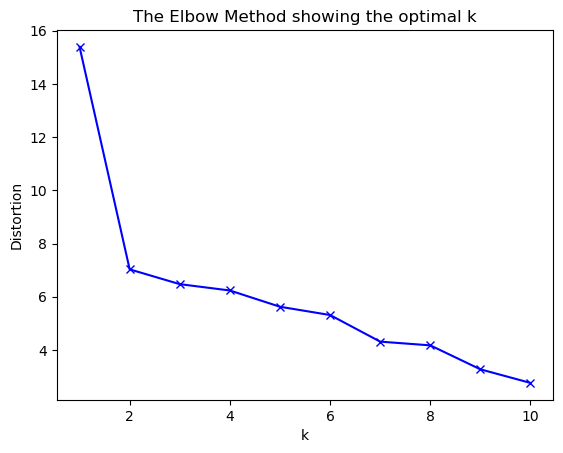

In [406]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(coventry_grouped_clustering)
    #kmeanModel.fit(coventry_grouped_clustering)
    distortions.append(sum(np.min(cdist(coventry_grouped_clustering, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / coventry_grouped_clustering.shape[0])

#There are different metric distance function for spatial distance. 
#I choose correlation instaed of euclidean because the canberra function gives me more clear view of elbow break point.

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [407]:
print(len(boroughs_venues_sorted))
print(len(coventry_merged))

16
16


In [408]:
coventry_merged = coventry_data_all

# add clustering labels
coventry_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
coventry_merged = coventry_merged.join(boroughs_venues_sorted.set_index('Borough'), on='Neighbourhoods')

coventry_merged.head() # check the last columns!

,Neighbourhoods,Latitude,Longitude,Neighbourhoods ids,postcodes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bablake,52.439341,-1.565273,8907,CV6 2AG,2,English Restaurant,American Restaurant,Lebanese Restaurant,Thai Restaurant,Restaurant,Portuguese Restaurant,Persian Restaurant,Pakistani Restaurant,Middle Eastern Restaurant,Mexican Restaurant
1,Cheylesmore,52.387161,-1.492103,8910,CV3 4AH,5,Chinese Restaurant,Fast Food Restaurant,Turkish Restaurant,Thai Restaurant,Indian Restaurant,Middle Eastern Restaurant,Lebanese Restaurant,Mexican Restaurant,Restaurant,Portuguese Restaurant
2,Earlsdon,52.393886,-1.531970,8909,CV3 5AZ,1,Indian Restaurant,Italian Restaurant,Thai Restaurant,Restaurant,Asian Restaurant,Latin American Restaurant,Fast Food Restaurant,Greek Restaurant,Japanese Restaurant,Portuguese Restaurant
3,Foleshill,52.428311,-1.497469,8914,CV1 4NZ,5,Fast Food Restaurant,Italian Restaurant,Turkish Restaurant,Asian Restaurant,Chinese Restaurant,Restaurant,Portuguese Restaurant,Middle Eastern Restaurant,Mexican Restaurant,Lebanese Restaurant
4,Henley,52.433886,-1.449003,8905,CV2 1EN,4,Restaurant,Fast Food Restaurant,Portuguese Restaurant,American Restaurant,Lebanese Restaurant,Thai Restaurant,Persian Restaurant,Pakistani Restaurant,Middle Eastern Restaurant,Mexican Restaurant


In [409]:
boroughs_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bablake,English Restaurant,American Restaurant,Lebanese Restaurant,Thai Restaurant,Restaurant,Portuguese Restaurant,Persian Restaurant,Pakistani Restaurant,Middle Eastern Restaurant,Mexican Restaurant
1,Cheylesmore,Chinese Restaurant,Fast Food Restaurant,Turkish Restaurant,Thai Restaurant,Indian Restaurant,Middle Eastern Restaurant,Lebanese Restaurant,Mexican Restaurant,Restaurant,Portuguese Restaurant
2,Earlsdon,Indian Restaurant,Italian Restaurant,Thai Restaurant,Restaurant,Asian Restaurant,Latin American Restaurant,Fast Food Restaurant,Greek Restaurant,Japanese Restaurant,Portuguese Restaurant
3,Foleshill,Fast Food Restaurant,Italian Restaurant,Turkish Restaurant,Asian Restaurant,Chinese Restaurant,Restaurant,Portuguese Restaurant,Middle Eastern Restaurant,Mexican Restaurant,Lebanese Restaurant
4,Henley,Restaurant,Fast Food Restaurant,Portuguese Restaurant,American Restaurant,Lebanese Restaurant,Thai Restaurant,Persian Restaurant,Pakistani Restaurant,Middle Eastern Restaurant,Mexican Restaurant


In [410]:
coventry_merged.head(10)

,Neighbourhoods,Latitude,Longitude,Neighbourhoods ids,postcodes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bablake,52.439341,-1.565273,8907,CV6 2AG,2,English Restaurant,American Restaurant,Lebanese Restaurant,Thai Restaurant,Restaurant,Portuguese Restaurant,Persian Restaurant,Pakistani Restaurant,Middle Eastern Restaurant,Mexican Restaurant
1,Cheylesmore,52.387161,-1.492103,8910,CV3 4AH,5,Chinese Restaurant,Fast Food Restaurant,Turkish Restaurant,Thai Restaurant,Indian Restaurant,Middle Eastern Restaurant,Lebanese Restaurant,Mexican Restaurant,Restaurant,Portuguese Restaurant
2,Earlsdon,52.393886,-1.531970,8909,CV3 5AZ,1,Indian Restaurant,Italian Restaurant,Thai Restaurant,Restaurant,Asian Restaurant,Latin American Restaurant,Fast Food Restaurant,Greek Restaurant,Japanese Restaurant,Portuguese Restaurant
3,Foleshill,52.428311,-1.497469,8914,CV1 4NZ,5,Fast Food Restaurant,Italian Restaurant,Turkish Restaurant,Asian Restaurant,Chinese Restaurant,Restaurant,Portuguese Restaurant,Middle Eastern Restaurant,Mexican Restaurant,Lebanese Restaurant
4,Henley,52.433886,-1.449003,8905,CV2 1EN,4,Restaurant,Fast Food Restaurant,Portuguese Restaurant,American Restaurant,Lebanese Restaurant,Thai Restaurant,Persian Restaurant,Pakistani Restaurant,Middle Eastern Restaurant,Mexican Restaurant
5,Holbrook,52.443502,-1.513496,8922,CV6 6HX,3,Fast Food Restaurant,American Restaurant,Indian Restaurant,Mexican Restaurant,Lebanese Restaurant,Thai Restaurant,Restaurant,Portuguese Restaurant,Persian Restaurant,Pakistani Restaurant
6,Longford,52.446222,-1.478762,8921,CV2 1NW,3,Fast Food Restaurant,American Restaurant,Indian Restaurant,Mexican Restaurant,Lebanese Restaurant,Thai Restaurant,Restaurant,Portuguese Restaurant,Persian Restaurant,Pakistani Restaurant
7,Lower Stoke,52.404403,-1.473717,8918,CV2 5FR,5,Fast Food Restaurant,Chinese Restaurant,Turkish Restaurant,Asian Restaurant,Indian Restaurant,Thai Restaurant,Portuguese Restaurant,Middle Eastern Restaurant,Lebanese Restaurant,Latin American Restaurant
8,Radford,52.424336,-1.517428,8917,CV6 1DT,1,Indian Restaurant,Middle Eastern Restaurant,Italian Restaurant,Asian Restaurant,Latin American Restaurant,Chinese Restaurant,Thai Restaurant,Restaurant,Portuguese Restaurant,Lebanese Restaurant
9,Sherbourne,52.416080,-1.535556,8916,CV6 1GH,1,Indian Restaurant,Italian Restaurant,Asian Restaurant,Fast Food Restaurant,Restaurant,Latin American Restaurant,Persian Restaurant,Chinese Restaurant,English Restaurant,Greek Restaurant


In [411]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(coventry_merged['Latitude'], coventry_merged['Longitude'], coventry_merged['Neighbourhoods'], coventry_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

### Cluster 1

In [412]:
coventry_merged.loc[coventry_merged['Cluster Labels'] == 0, coventry_merged.columns[[1] + list(range(5, coventry_merged.shape[1]))]]

,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,52.396166,0,Chinese Restaurant,Fast Food Restaurant,Restaurant,American Restaurant,Lebanese Restaurant,Thai Restaurant,Portuguese Restaurant,Persian Restaurant,Pakistani Restaurant,Middle Eastern Restaurant
14,52.412161,0,Chinese Restaurant,English Restaurant,Fast Food Restaurant,American Restaurant,Mexican Restaurant,Thai Restaurant,Restaurant,Portuguese Restaurant,Persian Restaurant,Pakistani Restaurant


### Cluster 2

In [413]:
coventry_merged.loc[coventry_merged['Cluster Labels'] == 1, coventry_merged.columns[[1] + list(range(5, coventry_merged.shape[1]))]]

,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,52.393886,1,Indian Restaurant,Italian Restaurant,Thai Restaurant,Restaurant,Asian Restaurant,Latin American Restaurant,Fast Food Restaurant,Greek Restaurant,Japanese Restaurant,Portuguese Restaurant
8,52.424336,1,Indian Restaurant,Middle Eastern Restaurant,Italian Restaurant,Asian Restaurant,Latin American Restaurant,Chinese Restaurant,Thai Restaurant,Restaurant,Portuguese Restaurant,Lebanese Restaurant
9,52.416080,1,Indian Restaurant,Italian Restaurant,Asian Restaurant,Fast Food Restaurant,Restaurant,Latin American Restaurant,Persian Restaurant,Chinese Restaurant,English Restaurant,Greek Restaurant
11,52.379894,1,Indian Restaurant,Restaurant,Fast Food Restaurant,Italian Restaurant,Asian Restaurant,American Restaurant,Mexican Restaurant,Thai Restaurant,Portuguese Restaurant,Persian Restaurant
13,52.410833,1,Indian Restaurant,Italian Restaurant,Chinese Restaurant,English Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Thai Restaurant,Restaurant,Asian Restaurant,Persian Restaurant


### Cluster 3

In [414]:
coventry_merged.loc[coventry_merged['Cluster Labels'] == 2, coventry_merged.columns[[1] + list(range(5, coventry_merged.shape[1]))]]

,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,52.439341,2,English Restaurant,American Restaurant,Lebanese Restaurant,Thai Restaurant,Restaurant,Portuguese Restaurant,Persian Restaurant,Pakistani Restaurant,Middle Eastern Restaurant,Mexican Restaurant


### Cluster 4

In [415]:
coventry_merged.loc[coventry_merged['Cluster Labels'] == 3, coventry_merged.columns[[1] + list(range(5, coventry_merged.shape[1]))]]

,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,52.443502,3,Fast Food Restaurant,American Restaurant,Indian Restaurant,Mexican Restaurant,Lebanese Restaurant,Thai Restaurant,Restaurant,Portuguese Restaurant,Persian Restaurant,Pakistani Restaurant
6,52.446222,3,Fast Food Restaurant,American Restaurant,Indian Restaurant,Mexican Restaurant,Lebanese Restaurant,Thai Restaurant,Restaurant,Portuguese Restaurant,Persian Restaurant,Pakistani Restaurant
15,52.412569,3,Fast Food Restaurant,American Restaurant,Indian Restaurant,Turkish Restaurant,English Restaurant,Greek Restaurant,Chinese Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant


### Cluster 5

In [416]:
coventry_merged.loc[coventry_merged['Cluster Labels'] == 4, coventry_merged.columns[[1] + list(range(5, coventry_merged.shape[1]))]]

,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,52.433886,4,Restaurant,Fast Food Restaurant,Portuguese Restaurant,American Restaurant,Lebanese Restaurant,Thai Restaurant,Persian Restaurant,Pakistani Restaurant,Middle Eastern Restaurant,Mexican Restaurant


### Cluster 6

In [417]:
coventry_merged.loc[coventry_merged['Cluster Labels'] == 5, coventry_merged.columns[[1] + list(range(5, coventry_merged.shape[1]))]]

,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,52.387161,5,Chinese Restaurant,Fast Food Restaurant,Turkish Restaurant,Thai Restaurant,Indian Restaurant,Middle Eastern Restaurant,Lebanese Restaurant,Mexican Restaurant,Restaurant,Portuguese Restaurant
3,52.428311,5,Fast Food Restaurant,Italian Restaurant,Turkish Restaurant,Asian Restaurant,Chinese Restaurant,Restaurant,Portuguese Restaurant,Middle Eastern Restaurant,Mexican Restaurant,Lebanese Restaurant
7,52.404403,5,Fast Food Restaurant,Chinese Restaurant,Turkish Restaurant,Asian Restaurant,Indian Restaurant,Thai Restaurant,Portuguese Restaurant,Middle Eastern Restaurant,Lebanese Restaurant,Latin American Restaurant
10,52.420333,5,Chinese Restaurant,Turkish Restaurant,Thai Restaurant,Fast Food Restaurant,Indian Restaurant,Portuguese Restaurant,Asian Restaurant,Middle Eastern Restaurant,Mexican Restaurant,Restaurant


##  Conclusion

As the analysis is performed on small set of data, we can achieve better results by increasing the neighborhood information

Coventry is an international city with may different types of restaurant businesses to offer, i believe we have gone through the process of identifying the business problem, specifying the data required, clean the datasets, performing a machine learning algorithm using k-means clustering and providing some useful tips to our stakeholder


I ended the study by visualising the data and clustering information on the Coventry map. In future studies, web or telephone applications can be carried out to direct investors.

## References:

* [1] [Coventry - Wikipedia](https://en.wikipedia.org/wiki/CV_postcode_area)
* [2] [MapIt UK](https://mapit.mysociety.org/)
* [3] [UK-GeoJSON](https://martinjc.github.io/UK-GeoJSON/)
* [4] [Forsquare API](https://developer.foursquare.com/)


